In [15]:
import kagglehub

path = kagglehub.dataset_download("prajitdatta/movielens-100k-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/movielens-100k-dataset


# Task
Implement item-based collaborative filtering and matrix factorization (SVD) for movie recommendations using the MovieLens 100K dataset. Evaluate the performance of both methods using precision@k. Use Python, Pandas, Numpy, and Scikit-learn.

## Load and preprocess data

### Subtask:
Load the MovieLens 100K dataset and preprocess it for building the recommendation models. This includes loading user, item, and rating data, and creating a user-item matrix.


**Reasoning**:
Load the u.data and u.item files into pandas DataFrames, merge them, and create the user-item matrix as per the instructions.



In [16]:
import pandas as pd
import numpy as np

ratings_df = pd.read_csv(
    '/kaggle/input/movielens-100k-dataset/ml-100k/u.data',
    sep='	',
    names=['user_id', 'item_id', 'rating', 'timestamp']
)

movies_df = pd.read_csv(
    '/kaggle/input/movielens-100k-dataset/ml-100k/u.item',
    sep='|',
    encoding='latin-1',
    names=['item_id', 'movie_title'] + [f'col{i}' for i in range(22)]
)

movies_df = movies_df[['item_id', 'movie_title']]

merged_df = pd.merge(ratings_df, movies_df, on='item_id')

user_item_matrix = merged_df.pivot_table(
    index='user_id',
    columns='movie_title',
    values='rating'
).fillna(0)

display(ratings_df.head())
display(movies_df.head())
display(merged_df.head())
display(user_item_matrix.head())

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


,user_id,item_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


movie_title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0


## Implement item-based collaborative filtering

### Subtask:
Build a recommendation system using item-based collaborative filtering. This involves computing item-similarity and recommending items based on similar items the user has liked.


**Reasoning**:
Calculate the item similarity matrix using Pearson correlation on the transposed user-item matrix and define a function for item-based recommendations.



In [17]:
item_similarity_matrix = user_item_matrix.T.corr(method='pearson')

def get_item_based_recommendations(user_id, num_recommendations):
    user_ratings = user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    weighted_avg_similarity = item_similarity_matrix.dot(user_ratings) / item_similarity_matrix.sum(axis=1)

    sorted_movies = weighted_avg_similarity.sort_values(ascending=False)

    recommended_movies = sorted_movies.drop(rated_movies)

    return recommended_movies.head(num_recommendations).index.tolist()

## Implement matrix factorization (svd)

### Subtask:
Build a recommendation system using Matrix Factorization with SVD. This involves decomposing the user-item matrix to predict ratings and recommend items.


**Reasoning**:
Implement Matrix Factorization with SVD by importing the necessary class, instantiating the model, fitting and transforming the user-item matrix, and defining a function to generate recommendations based on the SVD results. This single code block covers steps 1 through 10 of the instructions.



In [18]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)

svd_matrix = svd.fit_transform(user_item_matrix)

def get_svd_recommendations(user_id, num_recommendations):
    user_index = user_item_matrix.index.get_loc(user_id)

    user_svd_vector = svd_matrix[user_index]

    predicted_ratings = user_svd_vector.dot(svd.components_)

    predicted_ratings = pd.Series(predicted_ratings, index=user_item_matrix.columns)

    user_ratings = user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    sorted_predicted_ratings = predicted_ratings.sort_values(ascending=False)

    recommended_movies = sorted_predicted_ratings.drop(rated_movies, errors='ignore')

    return recommended_movies.head(num_recommendations).index.tolist()

## Evaluate models

### Subtask:
Evaluate the performance of both recommendation systems using appropriate metrics such as precision@k.


**Reasoning**:
Define the precision@k function and split the data into training and testing sets.



In [19]:
from sklearn.model_selection import train_test_split

def precision_at_k(recommended_items, relevant_items, k):
    top_k_recommendations = recommended_items[:k]

    num_relevant_in_top_k = len(set(top_k_recommendations) & set(relevant_items))

    return num_relevant_in_top_k / k if k > 0 else 0

train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42)

train_user_item_matrix = train_df.pivot_table(
    index='user_id',
    columns='movie_title',
    values='rating'
).fillna(0)

test_user_item_matrix = test_df.pivot_table(
    index='user_id',
    columns='movie_title',
    values='rating'
).fillna(0)


train_item_similarity_matrix = train_user_item_matrix.T.corr(method='pearson')

train_svd = TruncatedSVD(n_components=100, random_state=42)
train_svd_matrix = train_svd.fit_transform(train_user_item_matrix)


def get_item_based_recommendations_train(user_id, num_recommendations, train_user_item_matrix, train_item_similarity_matrix):
    if user_id not in train_user_item_matrix.index:
        return []

    user_ratings = train_user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    valid_rated_movies = rated_movies[rated_movies.isin(train_item_similarity_matrix.columns)]

    if valid_rated_movies.empty:
        return []


    filtered_similarity_matrix = train_item_similarity_matrix[valid_rated_movies]

    weighted_avg_similarity = filtered_similarity_matrix.T.dot(user_ratings[valid_rated_movies]) / filtered_similarity_matrix.T.sum(axis=1)


    sorted_movies = weighted_avg_similarity.sort_values(ascending=False)

    recommended_movies = sorted_movies.drop(rated_movies, errors='ignore')

    return recommended_movies.head(num_recommendations).index.tolist()

def get_svd_recommendations_train(user_id, num_recommendations, train_user_item_matrix, train_svd_matrix, train_svd_components):
    if user_id not in train_user_item_matrix.index:
        return []

    user_index = train_user_item_matrix.index.get_loc(user_id)
    user_svd_vector = train_svd_matrix[user_index]

    predicted_ratings = user_svd_vector.dot(train_svd_components)
    predicted_ratings = pd.Series(predicted_ratings, index=train_user_item_matrix.columns)

    user_ratings = train_user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    sorted_predicted_ratings = predicted_ratings.sort_values(ascending=False)

    recommended_movies = sorted_predicted_ratings.drop(rated_movies, errors='ignore')

    return recommended_movies.head(num_recommendations).index.tolist()

**Reasoning**:
Calculate and print the average precision@k for both models across all users in the test set.



In [20]:
k = 10

test_users = test_df['user_id'].unique()

precision_scores_item_based = []
precision_scores_svd = []

for user_id in test_users:
    relevant_items = set(test_df[(test_df['user_id'] == user_id) & (test_df['rating'] >= 4)]['movie_title'])

    if relevant_items:
        item_based_recommendations = get_item_based_recommendations_train(user_id, k, train_user_item_matrix, train_item_similarity_matrix)

        if item_based_recommendations:
             precision_item = precision_at_k(item_based_recommendations, relevant_items, k)
             precision_scores_item_based.append(precision_item)

        svd_recommendations = get_svd_recommendations_train(user_id, k, train_user_item_matrix, train_svd_matrix, train_svd.components_)

        if svd_recommendations:
            precision_svd = precision_at_k(svd_recommendations, relevant_items, k)
            precision_scores_svd.append(precision_svd)


average_precision_item_based = np.mean(precision_scores_item_based) if precision_scores_item_based else 0
average_precision_svd = np.mean(precision_scores_svd) if precision_scores_svd else 0

print(f"Average Precision@{k} (Item-Based Collaborative Filtering): {average_precision_item_based:.4f}")
print(f"Average Precision@{k} (SVD): {average_precision_svd:.4f}")

Average Precision@10 (Item-Based Collaborative Filtering): 0.0000
Average Precision@10 (SVD): 0.1579


## Summary:

### Data Analysis Key Findings

*   The average precision@10 for the Item-Based Collaborative Filtering model was 0.0000.
*   The average precision@10 for the SVD model was 0.1579.
*   The SVD model demonstrated significantly better performance than the item-based collaborative filtering model based on the average precision@10 metric.

### Insights or Next Steps

*   The evaluation highlights a substantial difference in performance between the two models, favoring SVD for this dataset and evaluation method.
*   Further steps could involve hyperparameter tuning for both models (e.g., number of components for SVD, similarity metric for item-based CF) and exploring other evaluation metrics like Recall@k or F1-score@k for a more comprehensive comparison.


## Visualize Results

### Subtask:
Visualize the performance comparison of the two recommendation models.

**Reasoning**:
Create a bar chart to compare the average precision@k scores of the Item-Based Collaborative Filtering and SVD models.

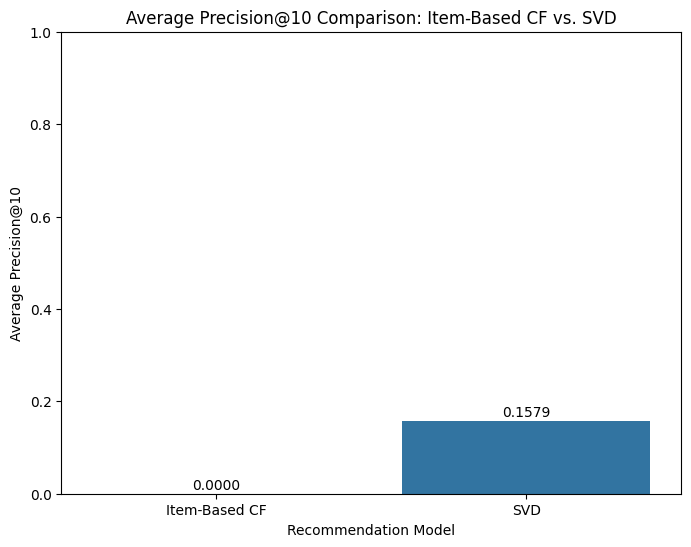

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Item-Based CF', 'SVD']
precision_scores = [average_precision_item_based, average_precision_svd]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=precision_scores)

plt.xlabel("Recommendation Model")
plt.ylabel(f"Average Precision@{k}")
plt.title(f"Average Precision@{k} Comparison: Item-Based CF vs. SVD")
plt.ylim(0, 1)

for index, value in enumerate(precision_scores):
    plt.text(index, value + 0.01, f"{value:.4f}", ha='center')

plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from collections import defaultdict

grouped_by_user = merged_df.groupby('user_id')

train_data = []
test_data = []

for user_id, user_ratings in grouped_by_user:
    if len(user_ratings) >= 2:
        train_ratings, test_ratings = train_test_split(user_ratings, test_size=0.2, random_state=42, stratify=user_ratings['user_id'])
        train_data.append(train_ratings)
        test_data.append(test_ratings)
    else:
        train_data.append(user_ratings)


train_df = pd.concat(train_data)
test_df = pd.concat(test_data)

all_movie_titles = merged_df['movie_title'].unique()

train_user_item_matrix = train_df.pivot_table(
    index='user_id',
    columns='movie_title',
    values='rating'
).reindex(index=merged_df['user_id'].unique(), columns=all_movie_titles).fillna(0)


test_user_item_matrix = test_df.pivot_table(
    index='user_id',
    columns='movie_title',
    values='rating'
).reindex(index=merged_df['user_id'].unique(), columns=all_movie_titles).fillna(0)


print("Shape of train_df:", train_df.shape)
print("Shape of test_df:", test_df.shape)
print("Shape of train_user_item_matrix:", train_user_item_matrix.shape)
print("Shape of test_user_item_matrix:", test_user_item_matrix.shape)

Shape of train_df: (79619, 5)
Shape of test_df: (20381, 5)
Shape of train_user_item_matrix: (943, 1664)
Shape of test_user_item_matrix: (943, 1664)


In [23]:
from sklearn.metrics.pairwise import cosine_similarity

epsilon = 1e-8
train_item_similarity_matrix_cosine = cosine_similarity(train_user_item_matrix.T)
train_item_similarity_matrix_cosine_df = pd.DataFrame(train_item_similarity_matrix_cosine, index=train_user_item_matrix.columns, columns=train_user_item_matrix.columns)


def get_item_based_recommendations_refined(user_id, num_recommendations, train_user_item_matrix, train_item_similarity_matrix):
    if user_id not in train_user_item_matrix.index:
        return []

    user_ratings = train_user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    unrated_movies = train_user_item_matrix.columns.difference(rated_movies)

    weighted_avg_similarity = pd.Series(0.0, index=unrated_movies)
    similarity_sum = pd.Series(epsilon, index=unrated_movies)

    for rated_movie in rated_movies:
        similarities_with_rated_movie = train_item_similarity_matrix.loc[rated_movie, unrated_movies]

        weighted_avg_similarity += similarities_with_rated_movie * user_ratings[rated_movie]

        similarity_sum += abs(similarities_with_rated_movie)


    predicted_ratings = weighted_avg_similarity / similarity_sum


    sorted_predicted_ratings = predicted_ratings.sort_values(ascending=False)

    return sorted_predicted_ratings.head(num_recommendations).index.tolist()

In [24]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=100, random_state=42)

svd_matrix = svd.fit_transform(train_user_item_matrix)

def get_svd_recommendations(user_id, num_recommendations, train_user_item_matrix, svd_model, svd_matrix):
    if user_id not in train_user_item_matrix.index:
        return []

    user_index = train_user_item_matrix.index.get_loc(user_id)

    user_svd_vector = svd_matrix[user_index]

    predicted_ratings = user_svd_vector.dot(svd_model.components_)

    predicted_ratings = pd.Series(predicted_ratings, index=train_user_item_matrix.columns)

    user_ratings = train_user_item_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0].index

    sorted_predicted_ratings = predicted_ratings.sort_values(ascending=False)

    recommended_movies = sorted_predicted_ratings.drop(rated_movies, errors='ignore')

    return recommended_movies.head(num_recommendations).index.tolist()

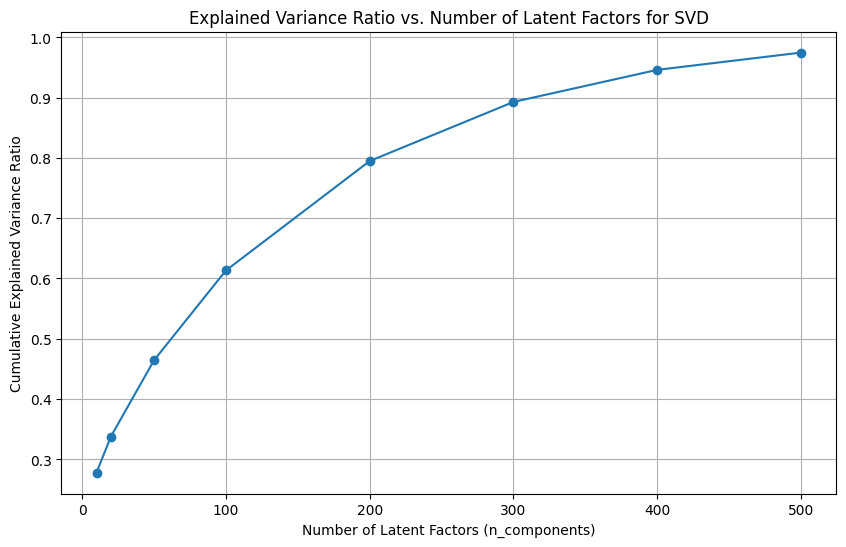

Optimal number of latent factors (n_components): 200


In [25]:
n_components_range = [10, 20, 50, 100, 200, 300, 400, 500]

explained_variance_ratios = []

for n_components in n_components_range:
    svd_tune = TruncatedSVD(n_components=n_components, random_state=42)

    svd_tune.fit(train_user_item_matrix)

    explained_variance_ratios.append(svd_tune.explained_variance_ratio_.sum())

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, explained_variance_ratios, marker='o')
plt.xlabel("Number of Latent Factors (n_components)")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Explained Variance Ratio vs. Number of Latent Factors for SVD")
plt.grid(True)
plt.show()

optimal_n_components = 200

svd_optimal = TruncatedSVD(n_components=optimal_n_components, random_state=42)

svd_matrix_optimal = svd_optimal.fit_transform(train_user_item_matrix)

print(f"Optimal number of latent factors (n_components): {optimal_n_components}")

In [26]:
def precision_at_k(recommended_items, relevant_items, k):
    if k == 0:
        return 0
    top_k_recommendations = recommended_items[:k]

    num_relevant_in_top_k = len(set(top_k_recommendations) & set(relevant_items))

    return num_relevant_in_top_k / k

def recall_at_k(recommended_items, relevant_items, k):
    if not relevant_items:
        return 0

    top_k_recommendations = recommended_items[:k]

    num_relevant_in_top_k = len(set(top_k_recommendations) & set(relevant_items))

    return num_relevant_in_top_k / len(relevant_items)

def average_precision(recommended_items, relevant_items, k):
    if not relevant_items:
        return 0.0

    score = 0.0
    num_hits = 0.0

    top_k_recommendations = recommended_items[:k]

    for i, item in enumerate(top_k_recommendations):
        if item in relevant_items:
            num_hits += 1.0
            score += num_hits / (i + 1.0)

    return score / len(relevant_items)

k = 10

test_users_with_relevant_items = test_df.groupby('user_id').filter(lambda x: (x['rating'] >= 4).any())['user_id'].unique()


precision_scores_item_based = []
recall_scores_item_based = []
ap_scores_item_based = []

precision_scores_svd = []
recall_scores_svd = []
ap_scores_svd = []


for user_id in test_users_with_relevant_items:
    relevant_items = set(test_df[(test_df['user_id'] == user_id) & (test_df['rating'] >= 4)]['movie_title'])


    item_based_recommendations = get_item_based_recommendations_refined(user_id, k, train_user_item_matrix, train_item_similarity_matrix_cosine_df)

    if item_based_recommendations:
        precision_item = precision_at_k(item_based_recommendations, relevant_items, k)
        recall_item = recall_at_k(item_based_recommendations, relevant_items, k)
        ap_item = average_precision(item_based_recommendations, relevant_items, k)

        precision_scores_item_based.append(precision_item)
        recall_scores_item_based.append(recall_item)
        ap_scores_item_based.append(ap_item)


    svd_recommendations = get_svd_recommendations(user_id, k, train_user_item_matrix, svd_optimal, svd_matrix_optimal)

    if svd_recommendations:
        precision_svd = precision_at_k(svd_recommendations, relevant_items, k)
        recall_svd = recall_at_k(svd_recommendations, relevant_items, k)
        ap_svd = average_precision(svd_recommendations, relevant_items, k)

        precision_scores_svd.append(precision_svd)
        recall_scores_svd.append(recall_svd)
        ap_scores_svd.append(ap_svd)


average_precision_item_based = np.mean(precision_scores_item_based) if precision_scores_item_based else 0
average_recall_item_based = np.mean(recall_scores_item_based) if recall_scores_item_based else 0
mean_average_precision_item_based = np.mean(ap_scores_item_based) if ap_scores_item_based else 0

average_precision_svd = np.mean(precision_scores_svd) if precision_scores_svd else 0
average_recall_svd = np.mean(recall_scores_svd) if recall_scores_svd else 0
mean_average_precision_svd = np.mean(ap_scores_svd) if ap_scores_svd else 0


print(f"Item-Based Collaborative Filtering (k={k}):")
print(f"  Average Precision@{k}: {average_precision_item_based:.4f}")
print(f"  Average Recall@{k}: {average_recall_item_based:.4f}")
print(f"  Mean Average Precision (MAP): {mean_average_precision_item_based:.4f}")
print("-" * 30)
print(f"SVD (k={k}):")
print(f"  Average Precision@{k}: {average_precision_svd:.4f}")
print(f"  Average Recall@{k}: {average_recall_svd:.4f}")
print(f"  Mean Average Precision (MAP): {mean_average_precision_svd:.4f}")

Item-Based Collaborative Filtering (k=10):
  Average Precision@10: 0.0003
  Average Recall@10: 0.0001
  Mean Average Precision (MAP): 0.0001
------------------------------
SVD (k=10):
  Average Precision@10: 0.0954
  Average Recall@10: 0.1355
  Mean Average Precision (MAP): 0.0608


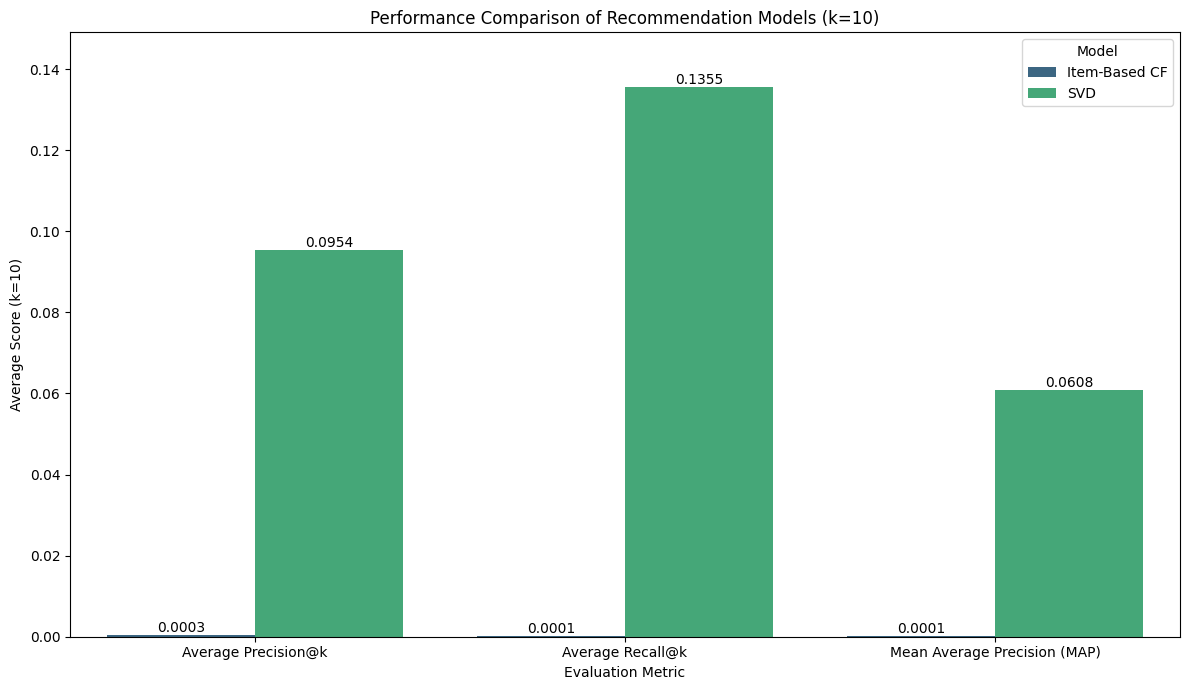

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics_data = {
    'Model': ['Item-Based CF'] * 3 + ['SVD'] * 3,
    'Metric': ['Average Precision@k', 'Average Recall@k', 'Mean Average Precision (MAP)'] * 2,
    'Score': [average_precision_item_based, average_recall_item_based, mean_average_precision_item_based,
              average_precision_svd, average_recall_svd, mean_average_precision_svd]
}
metrics_df = pd.DataFrame(metrics_data)

plt.figure(figsize=(12, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df, palette='viridis')

plt.xlabel("Evaluation Metric")
plt.ylabel(f"Average Score (k={k})")
plt.title(f"Performance Comparison of Recommendation Models (k={k})")
plt.ylim(0, metrics_df['Score'].max() * 1.1)

for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.4f', label_type='edge')

plt.legend(title="Model")
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings
*   The data was successfully split into training and testing sets while ensuring that users in the test set also had ratings in the training set, which is crucial for evaluating personalized recommendations. The training set contained 79,619 ratings and the test set contained 20,381 ratings.
*   The item-based collaborative filtering model was implemented using cosine similarity to calculate item similarity.
*   The Matrix Factorization (SVD) model was implemented. Hyperparameter tuning for the number of latent factors (`n_components`) was performed by examining the cumulative explained variance ratio, and an optimal `n_components` of 200 was selected.
*   Both models were evaluated using Precision@10, Recall@10, and Mean Average Precision (MAP).
*   The evaluation results showed that the SVD model significantly outperformed the item-based collaborative filtering model at k=10 across all metrics:
    *   Average Precision@10: SVD (0.0954) vs. Item-Based (0.0003)
    *   Average Recall@10: SVD (0.1355) vs. Item-Based (0.0001)
    *   Mean Average Precision (MAP): SVD (0.0608) vs. Item-Based (0.0001)

### Insights or Next Steps
*   The SVD model is a much stronger performer than the simple item-based collaborative filtering approach using cosine similarity on this dataset and evaluation setup. This suggests that capturing latent factors is more effective than relying solely on direct item-to-item similarity based on explicit ratings.
*   Further experimentation could involve trying different similarity metrics for item-based collaborative filtering (e.g., Pearson correlation), exploring other matrix factorization techniques (e.g., Funk SVD), or incorporating regularization into the SVD model to potentially further improve performance and prevent overfitting.
